# Análise e Tratamento de Dados - Projeto TECH EDU BAHIA (2020)

## Introdução:

Este projeto visa analisar dados educacionais na Bahia em 2020, focando nas cidades principais e na Região Metropolitana de Salvador. A tabela fornece informações sobre a presença de laboratórios de informática, computadores, e acesso à internet em escolas.

Banco de Dados CSV: (https://analitico.qedu.org.br/) 

Obs. Foi realizado o filtro no site para obter o banco de dados necessário para o cenário porposto na pesquisa. O ano mais recente disponível foi de 2020.

As colunas são:

- COD Municipio
- Cidade
- COD UF
- UF
- Total de escolas que nao possuem laboratório de informatica
- Total de escolas que possuem laboratório de informatica
- Total de escolas que nao possuem computador
- Total de escolas que possuem computador
- Total de escolas que não possuem acesso a internet
- Total de escolas que possuem acesso a internet
- Total de escolas que não possuem internet banda larga
- Total de escolas que possuem internet banda larga
- Total de escolas que nao possuem lousa digital
- Total de escolas que possuem lousa digital
- Total de escolas que nao possuem desktop em uso pelos alunos
- Total de escolas que possuem desktop em uso pelos alunos
- Total de computadores em uso pelos alunos - desktop
- Total de escolas que não possuem notebook em uso pelos alunos
- Total de escolas que possuem notebook em uso pelos alunos
- Total de computadores em uso pelos alunos - notebook
- Total de escolas que nao possuem tablets em uso pelos alunos
- Total de escolas que possuem tablets em uso pelos alunos
- Total de computadores em uso pelos alunos - tablet
- Total de escolas que nao possuem acesso a internet para os alunos
- Total de escolas que possuem acesso a internet para os alunos
- Total de escolas que não possuem acesso a internet para uso nos processos de ensino e aprendizagem
- Total de escolas que possuem acesso a internet para uso nos processos de ensino e aprendizagem
- Total de escolas sem rede local
- Total de escolas com rede local a cabo
- Total de escolas com rede local wireless
- Total de escolas com rede local a cabo e wireless
- Total de escolas com rede não informada



## Processamento:


In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 - Leitura e Tratamento do DataFrame:

In [2]:
# Carregando os dados do CSV
df = pd.read_csv('Dados_QEdu.csv', delimiter=';')
df

,COD Municipio,Cidade,COD UF,UF,Total de escolas que nao possuem laboratório de informatica,Total de escolas que possuem laboratório de informatica,Total de escolas que nao possuem computador,Total de escolas que possuem computador,Total de escolas que não possuem acesso a internet,Total de escolas que possuem acesso a internet,...,Total de computadores em uso pelos alunos - tablet,Total de escolas que nao possuem acesso a internet para os alunos,Total de escolas que possuem acesso a internet para os alunos,Total de escolas que não possuem acesso a internet para uso nos processos de ensino e aprendizagem,Total de escolas que possuem acesso a internet para uso nos processos de ensino e aprendizagem,Total de escolas sem rede local,Total de escolas com rede local a cabo,Total de escolas com rede local wireless,Total de escolas com rede local a cabo e wireless,Total de escolas com rede não informada
0,2916104,Itaparica,29,BA,21,3,"1,0",23,"3,0",21,...,0,23,"1,0",17,7,5,3,5,6,"5,0"
1,2910800,Feira de Santana,29,BA,312,98,"11,0",399,"2,0",408,...,406,171,"239,0",109,301,58,54,42,224,"32,0"
2,2932903,Valenca,29,BA,135,25,"75,0",85,"69,0",91,...,55,145,"15,0",115,45,13,32,15,15,"85,0"
3,2906501,Candeias,29,BA,48,31,"3,0",76,"2,0",77,...,15,76,"3,0",73,6,6,9,47,2,"15,0"
4,2927408,Salvador,29,BA,1006,429,"45,0",1390,"26,0",1409,...,92605,1061,"374,0",918,517,289,349,192,450,"155,0"
5,2913606,Ilheus,29,BA,60,37,"8,0",89,"12,0",85,...,30,82,"15,0",68,29,24,19,16,21,"17,0"
6,2914802,Itabuna,29,BA,90,55,"11,0",134,"13,0",132,...,54,101,"44,0",80,65,30,20,16,63,"16,0"
7,2910057,Dias dAvila,29,BA,57,8,"2,0",63,"1,0",64,...,5,57,"8,0",56,9,7,19,12,14,"13,0"
8,2933208,Vera Cruz,29,BA,46,8,"8,0",46,"3,0",51,...,6,47,"7,0",32,22,12,8,5,15,"14,0"
9,2919207,Lauro de Freitas,29,BA,93,37,"19,0",111,"33,0",97,...,249,95,"35,0",101,29,8,51,8,19,"44,0"


In [3]:
# Converta as colunas numéricas para inteiro
colunas_numericas = df.columns[4:]  # Supondo que as colunas numéricas comecem da quinta coluna
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Remova as colunas com valores nulos
df = df.dropna(axis=1)

# Exiba o DataFrame limpo
df

,COD Municipio,Cidade,COD UF,UF,Total de escolas que nao possuem laboratório de informatica,Total de escolas que possuem laboratório de informatica,Total de escolas que possuem computador,Total de escolas que possuem acesso a internet,Total de escolas que possuem internet banda larga,Total de escolas que nao possuem lousa digital,...,Total de computadores em uso pelos alunos - notebook,Total de escolas que nao possuem tablets em uso pelos alunos,Total de computadores em uso pelos alunos - tablet,Total de escolas que nao possuem acesso a internet para os alunos,Total de escolas que não possuem acesso a internet para uso nos processos de ensino e aprendizagem,Total de escolas que possuem acesso a internet para uso nos processos de ensino e aprendizagem,Total de escolas sem rede local,Total de escolas com rede local a cabo,Total de escolas com rede local wireless,Total de escolas com rede local a cabo e wireless
0,2916104,Itaparica,29,BA,21,3,23,21,20,24,...,27,24,0,23,17,7,5,3,5,6
1,2910800,Feira de Santana,29,BA,312,98,399,408,399,396,...,555,376,406,171,109,301,58,54,42,224
2,2932903,Valenca,29,BA,135,25,85,91,79,156,...,69,155,55,145,115,45,13,32,15,15
3,2906501,Candeias,29,BA,48,31,76,77,60,75,...,11,76,15,76,73,6,6,9,47,2
4,2927408,Salvador,29,BA,1006,429,1390,1409,1348,1315,...,92211,1156,92605,1061,918,517,289,349,192,450
5,2913606,Ilheus,29,BA,60,37,89,85,75,93,...,170,91,30,82,68,29,24,19,16,21
6,2914802,Itabuna,29,BA,90,55,134,132,121,142,...,214,133,54,101,80,65,30,20,16,63
7,2910057,Dias dAvila,29,BA,57,8,63,64,59,59,...,38,60,5,57,56,9,7,19,12,14
8,2933208,Vera Cruz,29,BA,46,8,46,51,46,52,...,58,52,6,47,32,22,12,8,5,15
9,2919207,Lauro de Freitas,29,BA,93,37,111,97,86,125,...,218,115,249,95,101,29,8,51,8,19


In [4]:
# Verificando os nomes das colunas no DataFrame
print(df.columns)

Index(['COD Municipio', 'Cidade', 'COD UF', 'UF',
       'Total de escolas que nao possuem laboratório de informatica',
       'Total de escolas que possuem laboratório de informatica',
       'Total de escolas que possuem computador',
       'Total de escolas que possuem acesso a internet',
       'Total de escolas que possuem internet banda larga',
       'Total de escolas que nao possuem lousa digital',
       'Total de escolas que nao possuemdesktop em uso pelos alunos',
       'Total de escolas que possuem desktop em uso pelos alunos',
       'Total de computadores em uso pelos alunos - desktop',
       'Total de escolas que não possuem notebook em uso pelos alunos',
       'Total de escolas que possuem notebook em uso pelos alunos',
       'Total de computadores em uso pelos alunos - notebook',
       'Total de escolas que nao possuem tablets em uso pelos alunos',
       'Total de computadores em uso pelos alunos - tablet',
       'Total de escolas que nao possuem acesso a intern

In [5]:
# Estatísticas descritivas
descricao_dados = df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 25 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   COD Municipio                                                                                       20 non-null     int64 
 1   Cidade                                                                                              20 non-null     object
 2   COD UF                                                                                              20 non-null     int64 
 3   UF                                                                                                  20 non-null     object
 4   Total de escolas que nao possuem laboratório de informatica                                         20 non-null     Int64 
 

In [6]:
# Cidades da Região Metropolitana de Salvador
cidades_regiao_metropolitana = ['Salvador', 'Camacari', 'Candeias', 'Lauro de Freitas', 'Simoes Filho', 'Madre de Deus', 'Mata de São João', 'Sao Francisco do Conde', 'Vera Cruz', 'Itaparica', 'Dias dAvila', 'Santo Antonio de Jesus', 'Sao Sebastiao do Passe']
# Filtrar DataFrame para Cidades da Região Metropolitana de Salvador
df_regiao_metropolitana = df[df['Cidade'].isin(cidades_regiao_metropolitana)]
df_regiao_metropolitana.info

<bound method DataFrame.info of     COD Municipio                  Cidade  COD UF  UF  \
0         2916104               Itaparica      29  BA   
3         2906501                Candeias      29  BA   
4         2927408                Salvador      29  BA   
7         2910057             Dias dAvila      29  BA   
8         2933208               Vera Cruz      29  BA   
9         2919207        Lauro de Freitas      29  BA   
10        2905701                Camacari      29  BA   
11        2919926           Madre de Deus      29  BA   
12        2930709            Simoes Filho      29  BA   
14        2929503  Sao Sebastiao do Passe      29  BA   
16        2921005        Mata de São João      29  BA   
17        2929206  Sao Francisco do Conde      29  BA   
19        2928703  Santo Antonio de Jesus      29  BA   

    Total de escolas que nao possuem laboratório de informatica  \
0                                                  21             
3                                  

In [7]:
# Cidades fora da Região Metropolitana de Salvador
cidades_fora_regiao_metropolitana = [cidade for cidade in df['Cidade'].unique() if cidade not in cidades_regiao_metropolitana]

# Filtrar DataFrame para Cidades fora da Região Metropolitana de Salvador
df_fora_regiao_metropolitana = df[df['Cidade'].isin(cidades_fora_regiao_metropolitana)]
df_fora_regiao_metropolitana.info

<bound method DataFrame.info of     COD Municipio                Cidade  COD UF  UF  \
1         2910800      Feira de Santana      29  BA   
2         2932903               Valenca      29  BA   
5         2913606                Ilheus      29  BA   
6         2914802               Itabuna      29  BA   
13        2925204                Pojuca      29  BA   
15        2918001                Jequie      29  BA   
18        2933307  Vitoria da Conquista      29  BA   

    Total de escolas que nao possuem laboratório de informatica  \
1                                                 312             
2                                                 135             
5                                                  60             
6                                                  90             
13                                                 23             
15                                                 49             
18                                                205     

In [8]:
total_escolas_com_internet_rm = df[df['Cidade'].isin(['Salvador', 'Camaçari', 'Lauro de Freitas', 'Simoes Filho', 'Mata de São João', 'Dias dAvila', 'Madre de Deus', 'Pojuca', 'Sao Sebastiao do Passe'])]
total_escolas_com_internet_rm = total_escolas_com_internet_rm['Total de escolas que possuem acesso a internet'].sum()
print(f'Total de escolas com acesso à internet na Região Metropolitana: {total_escolas_com_internet_rm}')


Total de escolas com acesso à internet na Região Metropolitana: 1791


In [9]:
total_cidades_sem_internet_fora_rm = df[~df['Cidade'].isin(['Salvador', 'Camaçari', 'Lauro de Freitas', 'Simoes Filho', 'Mata de São João', 'Dias dAvila', 'Madre de Deus', 'Pojuca', 'Sao Sebastiao do Passe'])]
total_cidades_sem_internet_fora_rm = total_cidades_sem_internet_fora_rm['Total de escolas que possuem acesso a internet'].sum()
print(f'Total de escolas com acesso à internet fora da Região Metropolitana: {total_cidades_sem_internet_fora_rm}')

Total de escolas com acesso à internet fora da Região Metropolitana: 1480


In [10]:
# Filtrando DataFrame para a Região Metropolitana de Salvador
df_rms = df[df['Cidade'].isin(cidades_regiao_metropolitana)]

# 5. Total de computadores em uso pelos alunos - tablet na RMS
total_computadores_rms = df_rms['Total de computadores em uso pelos alunos - tablet'].sum()
print(f'Total de computadores em uso pelos alunos - tablet na Região Metropolitana de Salvador: {total_computadores_rms}')



Total de computadores em uso pelos alunos - tablet na Região Metropolitana de Salvador: 93097


In [11]:
# Filtrando DataFrame para fora da Região Metropolitana de Salvador
df_fora_rms = df[~df['Cidade'].isin(cidades_regiao_metropolitana)]  # O operador ~ inverte a condição

# 6. Total de computadores em uso pelos alunos - tablet fora da RMS
total_computadores_fora_rms = df_fora_rms['Total de computadores em uso pelos alunos - tablet'].sum()
print(f'Total de computadores em uso pelos alunos - tablet fora da Região Metropolitana de Salvador: {total_computadores_fora_rms}')

Total de computadores em uso pelos alunos - tablet fora da Região Metropolitana de Salvador: 826


In [12]:
# Exportando a base final 
df = pd.DataFrame(df)
df.to_csv('base_final_QEdut.csv', index=False)

## Visualizações / Insights:

#### Grafico 1. Principais cidades com Escolas que possuem acesso à internet na RMS


C:\Users\Djleo\AppData\Local\Temp\ipykernel_25636\3866746175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total de escolas que possuem acesso a internet', y='Cidade', data=df_rm_sorted, palette='viridis')


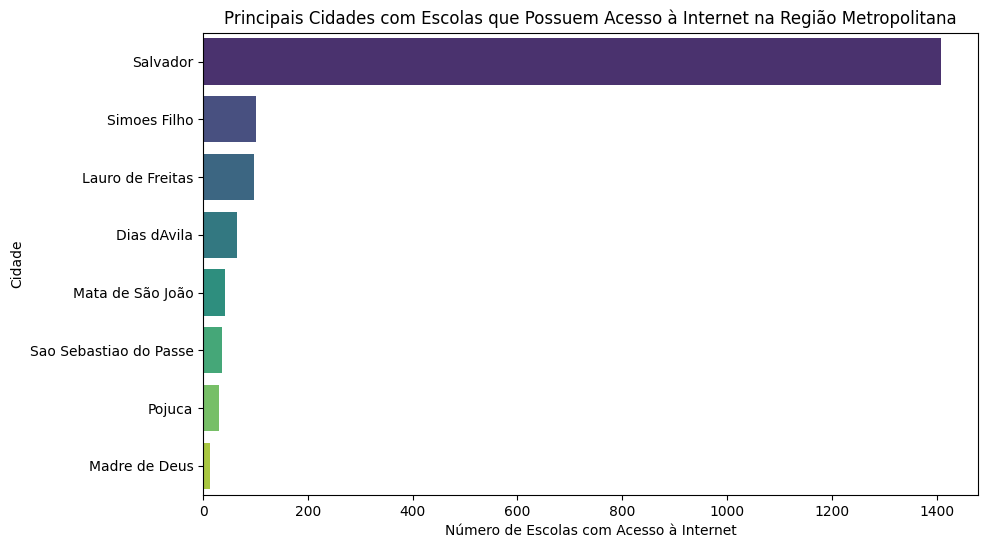

In [19]:
# Filtrando as cidades da Região Metropolitana
cidades_rm = ['Salvador', 'Camaçari', 'Lauro de Freitas', 'Simoes Filho', 'Mata de São João', 'Dias dAvila', 'Madre de Deus', 'Pojuca', 'Sao Sebastiao do Passe']
df_rm = df[df['Cidade'].isin(cidades_rm)]

# Ordenando as cidades pelo número de escolas com acesso à internet
df_rm_sorted = df_rm.sort_values(by='Total de escolas que possuem acesso a internet', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Total de escolas que possuem acesso a internet', y='Cidade', data=df_rm_sorted, palette='viridis')
plt.title('Principais Cidades com Escolas que Possuem Acesso à Internet na Região Metropolitana')
plt.xlabel('Número de Escolas com Acesso à Internet')
plt.ylabel('Cidade')
plt.show()

Insigth 1: O gráfico destaca que Salvador lidera em número de escolas com acesso à internet na Região Metropolitana, indicando um maior investimento em infraestrutura tecnológica na capital.

Insight 2:  Madre de Deus apresenta o menor número de escolas com acesso à internet na Região Metropolitana, destacando desafios específicos em relação à infraestrutura tecnológica nessa localidade. Este cenário sugere a necessidade de estratégias direcionadas para melhorar a conectividade e recursos tecnológicos nas escolas de Madre de Deus, visando proporcionar condições mais equitativas de acesso à educação digital. Investimentos em infraestrutura e programas específicos podem ser considerados para impulsionar a inclusão digital nessa comunidade.

#### Gráfico 2: Comparação do Número Total de Escolas com Acesso à Internet: Salvador vs. Outras Cidades

C:\Users\Djleo\AppData\Local\Temp\ipykernel_25636\1625185099.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total de escolas que possuem acesso a internet', y='Cidade', data=df_agrupado, palette='viridis')


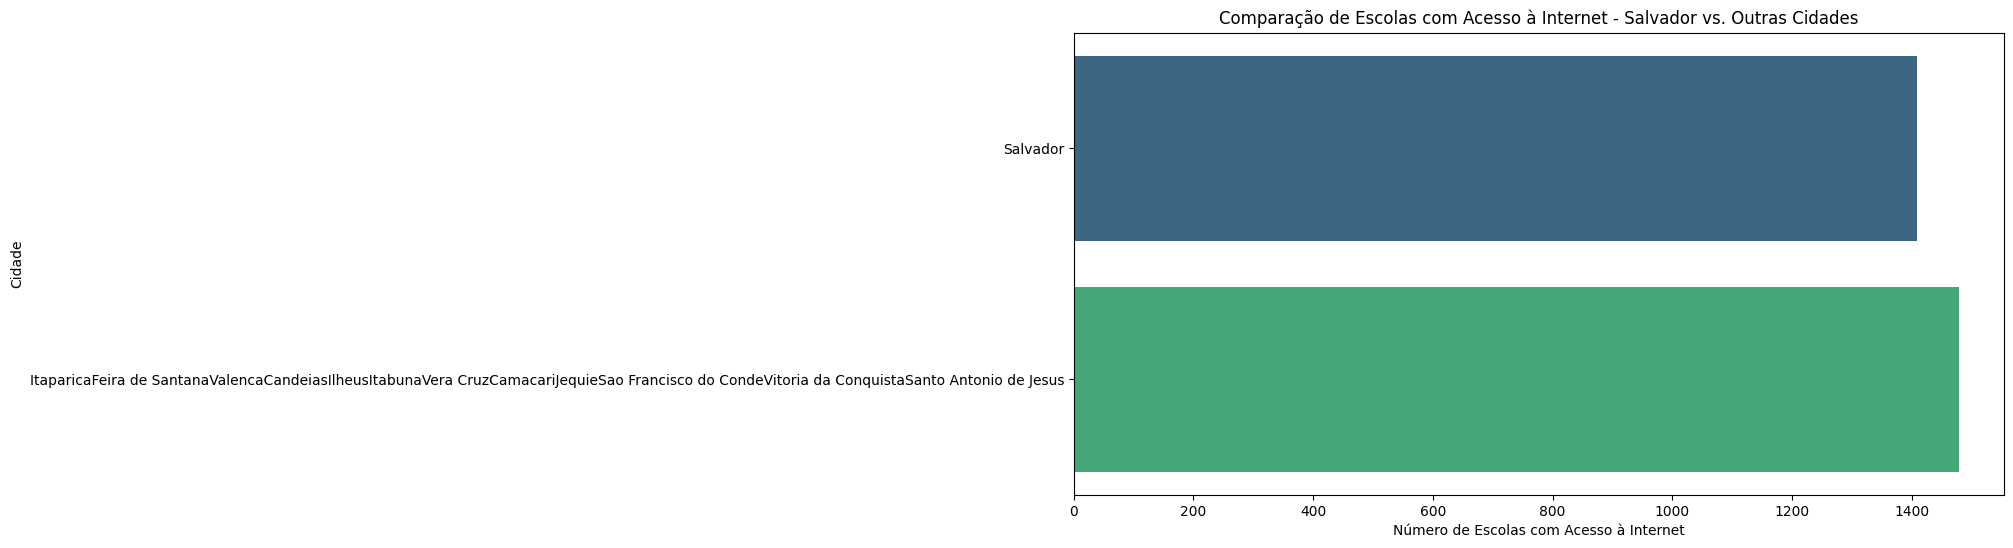

In [14]:
# Filtrando as cidades da Região Metropolitana
cidades_rm = ['Salvador', 'Camaçari', 'Lauro de Freitas', 'Simoes Filho', 'Mata de São João', 'Dias dAvila', 'Madre de Deus', 'Pojuca', 'Sao Sebastiao do Passe']
df_rm = df[df['Cidade'].isin(cidades_rm)]

# Filtrando a cidade de Salvador
df_salvador = df[df['Cidade'] == 'Salvador']

# Filtrando as cidades fora da Região Metropolitana de Salvador
cidades_fora_rm = [cidade for cidade in df['Cidade'].unique() if cidade not in cidades_rm]
df_fora_rm = df[df['Cidade'].isin(cidades_fora_rm)]

# Totalizando os dados para Salvador
total_salvador = df_salvador.sum()

# Totalizando os dados para as outras cidades
total_outras_cidades = df_fora_rm.sum()

# Criando DataFrames para os totais
df_total_salvador = pd.DataFrame(total_salvador).transpose()
df_total_outras_cidades = pd.DataFrame(total_outras_cidades).transpose()

# Concatenando os DataFrames
df_agrupado = pd.concat([df_total_salvador, df_total_outras_cidades])

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Total de escolas que possuem acesso a internet', y='Cidade', data=df_agrupado, palette='viridis')
plt.title('Comparação de Escolas com Acesso à Internet - Salvador vs. Outras Cidades')
plt.xlabel('Número de Escolas com Acesso à Internet')
plt.ylabel('Cidade')
plt.show()

Insight 1:
Salvador destaca-se significativamente em relação às outras cidades fora da Região Metropolitana, liderando em termos de escolas com acesso à internet. Esse destaque pode indicar um maior investimento em infraestrutura educacional na capital.

Insight 2:
A disparidade entre Salvador e as outras cidades sugere uma possível lacuna digital entre a capital e os municípios circundantes. Essa diferença pode influenciar o acesso a recursos online e tecnologias educacionais, impactando a qualidade do ensino e aprendizado nas diferentes localidades.

#### Gráfico 3 : Comparação do Número Total de Computadores em Uso por Alunos - Desktop: Salvador vs. Outras Cidades

Este código cria um gráfico de barras que compara o número total de computadores em uso pelos alunos - desktop em Salvador com o total para as demais cidades que não fazem parte da Região Metropolitana de Salvador.

C:\Users\Djleo\AppData\Local\Temp\ipykernel_25636\863600363.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total de computadores em uso pelos alunos - desktop', y='Cidade', data=df_agrupado_desktop, palette='viridis')


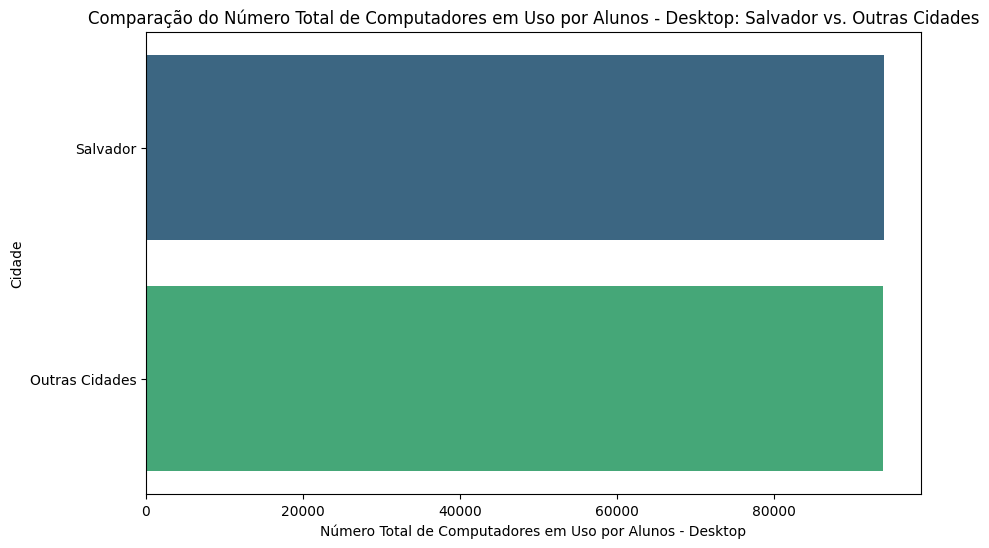

In [15]:
# Filtrando a cidade de Salvador
df_salvador = df[df['Cidade'] == 'Salvador']

# Filtrando as cidades fora da Região Metropolitana de Salvador
cidades_fora_rm = [cidade for cidade in df['Cidade'].unique() if cidade not in cidades_rm]
df_fora_rm = df[df['Cidade'].isin(cidades_fora_rm)]

# Totalizando os dados para Salvador
total_salvador_desktop = df_salvador['Total de computadores em uso pelos alunos - desktop'].sum()

# Totalizando os dados para as outras cidades
total_outras_cidades_desktop = df_fora_rm['Total de computadores em uso pelos alunos - desktop'].sum()

# Criando um DataFrame para os totais
df_agrupado_desktop = pd.DataFrame({
    'Cidade': ['Salvador', 'Outras Cidades'],
    'Total de computadores em uso pelos alunos - desktop': [total_salvador_desktop, total_outras_cidades_desktop]
})

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Total de computadores em uso pelos alunos - desktop', y='Cidade', data=df_agrupado_desktop, palette='viridis')
plt.title('Comparação do Número Total de Computadores em Uso por Alunos - Desktop: Salvador vs. Outras Cidades')
plt.xlabel('Número Total de Computadores em Uso por Alunos - Desktop')
plt.ylabel('Cidade')
plt.show()

Insight 1:
A cidade de Salvador apresenta uma quantidade expressiva de computadores desktop em uso por alunos, indicando um investimento significativo em recursos tecnológicos nas instituições de ensino. Essa liderança pode contribuir para uma experiência de aprendizado mais tecnologicamente avançada na capital.

Insight 2:
A diferença notável no número total de computadores desktop entre Salvador e as outras cidades sugere possíveis disparidades na infraestrutura educacional e no acesso a recursos tecnológicos. Essa discrepância pode influenciar diretamente a qualidade do ensino e a preparação tecnológica dos alunos nas diferentes regiões.

#### Gráfico 4: Principais Cidades com Escolas que Possuem Acesso à Internet (Fora RMS)

C:\Users\Djleo\AppData\Local\Temp\ipykernel_25636\1918555997.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total de escolas que possuem acesso a internet', y='Cidade', data=df_fora_rm_sorted_internet, palette='viridis')


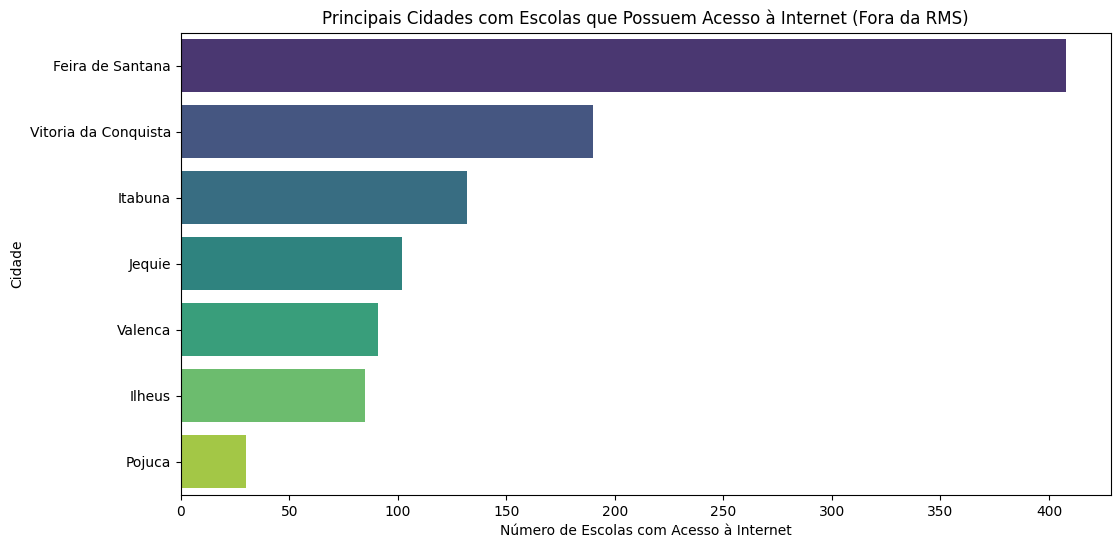

In [16]:
# Ordenando as cidades fora da RMS pelo número de escolas com acesso à internet
df_fora_rm_sorted_internet = df_fora_regiao_metropolitana.sort_values(by='Total de escolas que possuem acesso a internet', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Total de escolas que possuem acesso a internet', y='Cidade', data=df_fora_rm_sorted_internet, palette='viridis')
plt.title('Principais Cidades com Escolas que Possuem Acesso à Internet (Fora da RMS)')
plt.xlabel('Número de Escolas com Acesso à Internet')
plt.ylabel('Cidade')
plt.show()

#### Gráfico 5: Total de Computadores em Uso por Alunos nas Cidades Fora da Região Metropolitana de Salvador

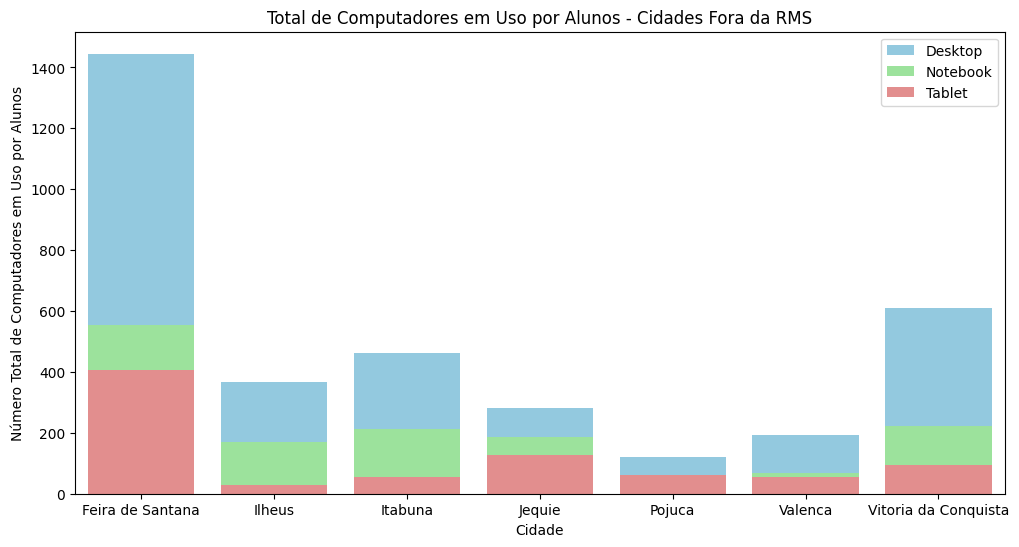

In [17]:
df_agrupado_fora_rm = df_fora_regiao_metropolitana.groupby('Cidade').agg({
    'Total de computadores em uso pelos alunos - desktop': 'sum',
    'Total de computadores em uso pelos alunos - notebook': 'sum',
    'Total de computadores em uso pelos alunos - tablet': 'sum'
}).reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Cidade', y='Total de computadores em uso pelos alunos - desktop', data=df_agrupado_fora_rm, label='Desktop', color='skyblue')
sns.barplot(x='Cidade', y='Total de computadores em uso pelos alunos - notebook', data=df_agrupado_fora_rm, label='Notebook', color='lightgreen')
sns.barplot(x='Cidade', y='Total de computadores em uso pelos alunos - tablet', data=df_agrupado_fora_rm, label='Tablet', color='lightcoral')
plt.title('Total de Computadores em Uso por Alunos - Cidades Fora da RMS')
plt.xlabel('Cidade')
plt.ylabel('Número Total de Computadores em Uso por Alunos')
plt.legend()
plt.show()

#### Gráfico 6: Total de Computadores em Uso por Alunos na Região Metropolitana de Salvador

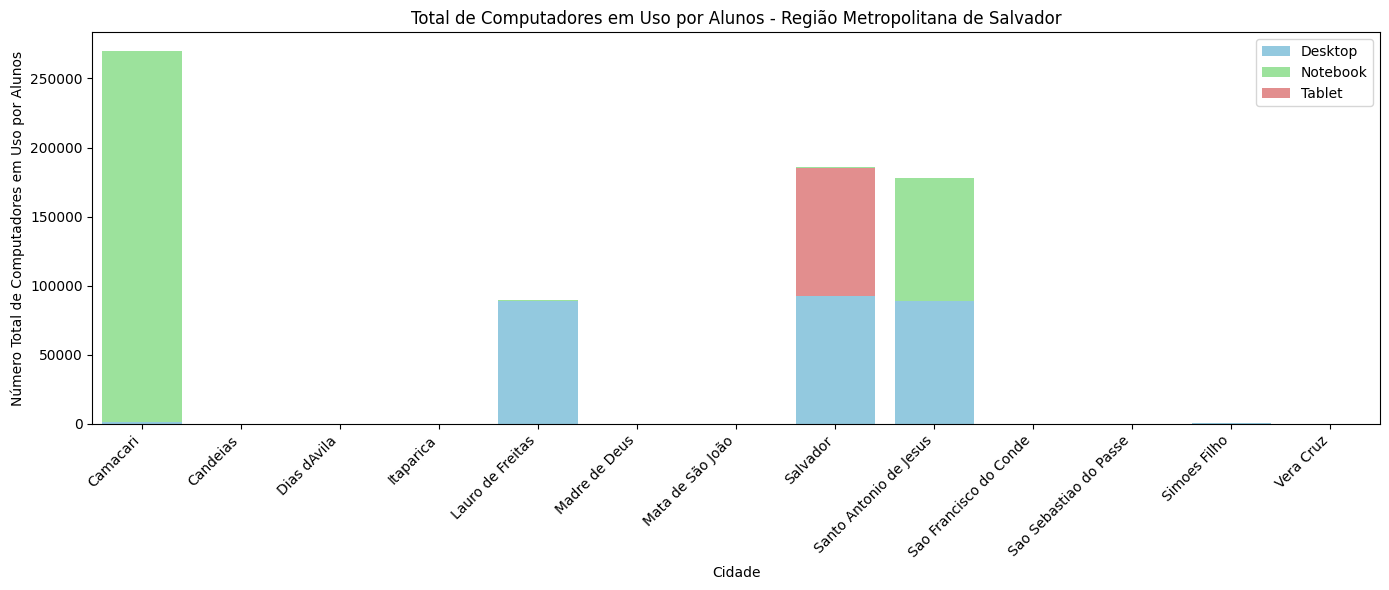

In [18]:
# Lista das cidades da Região Metropolitana de Salvador
cidades_regiao_metropolitana = ['Salvador', 'Camacari', 'Candeias', 'Lauro de Freitas', 'Simoes Filho', 'Madre de Deus', 'Mata de São João', 'Sao Francisco do Conde', 'Vera Cruz', 'Itaparica', 'Dias dAvila', 'Santo Antonio de Jesus', 'Sao Sebastiao do Passe']

# Filtrando as cidades da Região Metropolitana
df_rm = df[df['Cidade'].isin(cidades_regiao_metropolitana)]

# Agrupando os dados para a Região Metropolitana de Salvador
df_agrupado_rm = df_rm.groupby('Cidade').agg({
    'Total de computadores em uso pelos alunos - desktop': 'sum',
    'Total de computadores em uso pelos alunos - notebook': 'sum',
    'Total de computadores em uso pelos alunos - tablet': 'sum'
}).reset_index()

# Criando o gráfico de barras empilhadas com rótulos girados
plt.figure(figsize=(14, 6))
sns.barplot(x='Cidade', y='Total de computadores em uso pelos alunos - desktop', data=df_agrupado_rm, color='skyblue', label='Desktop')
sns.barplot(x='Cidade', y='Total de computadores em uso pelos alunos - notebook', data=df_agrupado_rm, color='lightgreen', bottom=df_agrupado_rm['Total de computadores em uso pelos alunos - desktop'], label='Notebook')
sns.barplot(x='Cidade', y='Total de computadores em uso pelos alunos - tablet', data=df_agrupado_rm, color='lightcoral', bottom=df_agrupado_rm['Total de computadores em uso pelos alunos - notebook'], label='Tablet')

plt.title('Total de Computadores em Uso por Alunos - Região Metropolitana de Salvador')
plt.xlabel('Cidade')
plt.ylabel('Número Total de Computadores em Uso por Alunos')
plt.xticks(rotation=45, ha='right')  # Girar os rótulos para melhor legibilidade
plt.legend()
plt.tight_layout()  # Melhorar o espaçamento entre os elementos do gráfico
plt.show()

Insight 1: A variação nas alturas das barras destaca a disparidade na distribuição de dispositivos nas cidades da RM Salvador. Algumas cidades mostram uma preferência notável por computadores desktop, enquanto outras priorizam notebooks e tablets. Essa disparidade pode refletir decisões estratégicas locais ou diferentes níveis de investimento em tecnologia educacional.

Insight 2: Com base na disparidade identificada, há uma oportunidade para os gestores educacionais personalizarem suas estratégias de implementação de tecnologia.

FIM!
